In [139]:
#project description
"""The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time
performance of domestic flights operated by large air carriers. Summary information on the number of
on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer
Report and in this dataset of 2015 flight delays and cancellations."""

"The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time\nperformance of domestic flights operated by large air carriers. Summary information on the number of\non-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer\nReport and in this dataset of 2015 flight delays and cancellations."

In [140]:
"""1. Load the three CSV files (airlines.csv, airports.csv, and flights.csv). 
Display the shape and column names for each file."""

'1. Load the three CSV files (airlines.csv, airports.csv, and flights.csv). \nDisplay the shape and column names for each file.'

In [141]:
#import necessary libraries
import pandas as pd

#load the three CSV files
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights.csv", low_memory = False)

In [142]:
"""Assumption: Assuming all questions build on the previous question in terms of changes to the datasets."""

'Assumption: Assuming all questions build on the previous question in terms of changes to the datasets.'

In [143]:
#display shape and column names for each file
airlines_shape = airlines.shape
airlines_col_names = airlines.columns.tolist()
print(f'The airlines.csv file has the shape {airlines_shape} and the following column names: {airlines_col_names}.')

airports_shape = airports.shape
airports_col_names = airports.columns.tolist()
print(f'The airports.csv file has the shape {airports_shape} and the following column names: {airports_col_names}.')

flights_shape = flights.shape
flights_col_names = flights.columns.tolist()
print(f'The flights.csv file has the shape {flights_shape} and the following column names: {flights_col_names}.')

The airlines.csv file has the shape (14, 2) and the following column names: ['IATA_CODE', 'AIRLINE'].
The airports.csv file has the shape (322, 7) and the following column names: ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'].
The flights.csv file has the shape (5819079, 31) and the following column names: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'].


In [144]:
"""2. Remove all cancelled and diverted flights (5 points)."""

'2. Remove all cancelled and diverted flights (5 points).'

In [145]:
#inspect cancelled and diverted flights
flights["CANCELLED"].unique()
flights["DIVERTED"].unique()

#remove all cancelled and diverted flights

"""Assumption: Assuming 1 is cancelled and 0 is not cancelled.
Assuming 1 is diverted and 0 is not diverted."""


flights = flights[(flights.CANCELLED != 1) & (flights.DIVERTED != 1)]

In [146]:
"""3. Replace missing values in all delay reason columns ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') with 0. Show the number of missing values for each of the columns before
replacement, and confirm that missing values have been replaced (5 points)."""

"3. Replace missing values in all delay reason columns ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', \n'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') with 0. Show the number of missing values for each of the columns before\nreplacement, and confirm that missing values have been replaced (5 points)."

In [147]:
#replace missing values in all delay reason columns with 0
delay_columns = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

#show the number of missing values for each of the columns before replacement
print("Missing values before replacement:")
print(flights[delay_columns].isnull().sum())

#replace missing values with 0 in the specified columns
flights[delay_columns] = flights[delay_columns].fillna(0)

#confirm the missing values have been replaced
print("Missing values after replacement:")
print(flights[delay_columns].isnull().sum())

Missing values before replacement:
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64
Missing values after replacement:
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


In [148]:
"""4. Drop rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'. 
Show the number of flights before and after dropping the missing values (5 points)."""

"4. Drop rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'. \nShow the number of flights before and after dropping the missing values (5 points)."

In [149]:
#show the number of flights before dropping the missing values
number_flights_before = flights.shape[0]
print(f"There were {number_flights_before} flights before dropping the missing values.")

#drops rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'
flights.dropna(subset = ['ARRIVAL_TIME', 'DEPARTURE_TIME', 'AIR_TIME'], inplace = True)

#show the number of flights after dropping the missing values
number_flights_after = flights.shape[0]
print(f"There were {number_flights_after} flights after dropping the missing values.")

There were 5714008 flights before dropping the missing values.
There were 5714008 flights after dropping the missing values.


In [150]:
"""5. Create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight (5 points)."""

"5. Create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight (5 points)."

In [151]:
#create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight
flights["TOTAL_DELAY"] = flights['AIR_SYSTEM_DELAY'] + flights['SECURITY_DELAY'] + flights['AIRLINE_DELAY'] + flights['LATE_AIRCRAFT_DELAY'] + flights['WEATHER_DELAY']

#inspecting "TOTAL_DELAY" variable
#flights["TOTAL_DELAY"].unique()
#flights["TOTAL_DELAY"].value_counts()

In [152]:
"""6. Create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' (e.g., 1330 → 13) (5 points)."""

"6. Create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' (e.g., 1330 → 13) (5 points)."

In [153]:
#create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE'
flights["SCHEDULED_HOUR"] = flights["SCHEDULED_DEPARTURE"].astype(int)
flights["SCHEDULED_HOUR"] = flights["SCHEDULED_HOUR"] // 100

#inspecting "SCHEDULED_HOUR" variable
#flights["SCHEDULED_HOUR"].value_counts()

In [154]:
"""7. In the flights dataset, how many unique airlines are there? List their airline code and airline names (7.5 points)."""

'7. In the flights dataset, how many unique airlines are there? List their airline code and airline names (7.5 points).'

In [155]:
#number of unique airlines
unique_values = airlines["AIRLINE"].unique()
num_unique_values = len(unique_values)
print(f'There are {num_unique_values} unique airlines.')

#list their airline code and airline names
airlines_index = airlines.set_index('IATA_CODE')
print(airlines_index.loc[flights['AIRLINE'].unique()][['AIRLINE']])

There are 14 unique airlines.
                                AIRLINE
IATA_CODE                              
AS                 Alaska Airlines Inc.
AA               American Airlines Inc.
US                      US Airways Inc.
DL                 Delta Air Lines Inc.
NK                     Spirit Air Lines
UA                United Air Lines Inc.
HA               Hawaiian Airlines Inc.
B6                      JetBlue Airways
OO                Skywest Airlines Inc.
EV          Atlantic Southeast Airlines
F9               Frontier Airlines Inc.
WN               Southwest Airlines Co.
MQ         American Eagle Airlines Inc.
VX                       Virgin America


In [156]:
"""8. What are the top 5 most common destination airports by number of flights? 
List the IATA_CODE, Airport Name, and flight count (7.5 points)."""

'8. What are the top 5 most common destination airports by number of flights? \nList the IATA_CODE, Airport Name, and flight count (7.5 points).'

In [157]:
#top 5 most common destination airports by number of flights
top5_dest = flights["DESTINATION_AIRPORT"].value_counts().head(5)
#print(top5_dest)

top5_dest_df = top5_dest.reset_index()
#print(top5_dest_df)

top5_dest_df.columns = ['IATA_CODE', 'Flight_Count']
#print(top5_dest_df)

#merge with airports DataFrame to get airport names
top5_dest_info = pd.merge(top5_dest_df, airports, on='IATA_CODE')[['IATA_CODE', 'AIRPORT', 'Flight_Count']]
print(top5_dest_info)

  IATA_CODE                                           AIRPORT  Flight_Count
0       ATL  Hartsfield-Jackson Atlanta International Airport        343076
1       ORD              Chicago O'Hare International Airport        275864
2       DFW           Dallas/Fort Worth International Airport        231764
3       DEN                      Denver International Airport        193033
4       LAX                 Los Angeles International Airport        192136


In [158]:
"""9. Which destination city has the highest average total delay? (7.5 points)."""

'9. Which destination city has the highest average total delay? (7.5 points).'

In [ ]:
#calculate average total delay by destination airport
avg_delay_by_dest = flights.groupby('DESTINATION_AIRPORT')['TOTAL_DELAY'].mean().reset_index()
#print(avg_delay_by_dest.head())

#merge with airports to get city names
#any airport without a city name will be filtered out
avg_delay_with_city = pd.merge(avg_delay_by_dest, airports[['IATA_CODE', 'CITY']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

#sort by average delay descending and display the top result
top_delay_city = avg_delay_with_city.sort_values(by = 'TOTAL_DELAY', ascending = False).head(1)
print(top_delay_city[['DESTINATION_AIRPORT', 'CITY', 'TOTAL_DELAY']])
print(f'The destination city with the highest average total delay is Wilmington.')

    DESTINATION_AIRPORT        CITY  TOTAL_DELAY
154                 ILG  Wilmington    24.663158
The destination city with the highest average total delay is Wilmington.


In [160]:
"""10. What is the average arrival delay for each airline? (7.5 points)."""

'10. What is the average arrival delay for each airline? (7.5 points).'

In [161]:
#calculate average arrival delay by airline
avg_arrival_delay_by_airline = flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()

#sort by average arrival delay
arrival_delay_sorted = avg_arrival_delay_by_airline.sort_values(by = 'ARRIVAL_DELAY', ascending = False).head()
print(arrival_delay_sorted)

  AIRLINE  ARRIVAL_DELAY
8      NK      14.471800
5      F9      12.504706
2      B6       6.677861
4      EV       6.585379
7      MQ       6.457873


In [162]:
"""11. How many flights were cancelled per airline? (7.5 points)."""

'11. How many flights were cancelled per airline? (7.5 points).'

In [163]:
#reading in flights again, since I removed all cancelled flights in question 2
flights = pd.read_csv("flights.csv", low_memory = False)

In [164]:
"""Assumption: The rest of the questions build off of the original dataset 
and keep the modifications from previous questions following question 11."""

'Assumption: The rest of the questions build off of the original dataset \nand keep the modifications from previous questions following question 11.'

In [165]:
#flights cancelled per airline
flights_cancelled_by_airline = flights.groupby('AIRLINE')['CANCELLED'].value_counts().reset_index()
flights_cancelled_by_airline = flights_cancelled_by_airline[flights_cancelled_by_airline.CANCELLED == 1]
flights_cancelled_by_airline = flights_cancelled_by_airline.sort_values(by = 'count', ascending = False)
print('The number of flights cancelled per airline are listed below:')
print(flights_cancelled_by_airline)

The number of flights cancelled per airline are listed below:
   AIRLINE  CANCELLED  count
27      WN          1  16043
9       EV          1  15231
15      MQ          1  15025
1       AA          1  10919
19      OO          1   9960
21      UA          1   6573
5       B6          1   4276
23      US          1   4067
7       DL          1   3824
17      NK          1   2004
3       AS          1    669
11      F9          1    588
25      VX          1    534
13      HA          1    171


In [166]:
"""12. Which hour of the day had the most scheduled departures? (7.5 points)."""

'12. Which hour of the day had the most scheduled departures? (7.5 points).'

In [167]:
#create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' - from question 6
flights["SCHEDULED_HOUR"] = flights["SCHEDULED_DEPARTURE"].astype(int)
flights["SCHEDULED_HOUR"] = flights["SCHEDULED_HOUR"] // 100

#most scheduled departures
most_scheduled_departure_hour = flights['SCHEDULED_HOUR'].value_counts(ascending = False).reset_index()
print(most_scheduled_departure_hour.head())
print('The hour of the day with the most scheduled departures in 6:00 AM.')

   SCHEDULED_HOUR   count
0               6  406940
1               7  393947
2              17  390362
3               8  381014
4              10  371644
The hour of the day with the most scheduled departures in 6:00 AM.


In [168]:
"""13. Which city had the most flights arriving overall? (5 points)."""

'13. Which city had the most flights arriving overall? (5 points).'

In [169]:
#merge with airports DataFrame to get city names
arrivals_with_city = pd.merge(flights, airports, left_on = 'DESTINATION_AIRPORT', right_on = "IATA_CODE", how = 'left')

#city with the most flights arriving overall
most_flights_arriving = arrivals_with_city['CITY'].value_counts().sort_values(ascending = False)
print(most_flights_arriving.head())
print('The city with the most flights arriving overall is Chicago.')

CITY
Chicago              366790
Atlanta              346904
Dallas-Fort Worth    239582
Houston              198724
Denver               196010
Name: count, dtype: int64
The city with the most flights arriving overall is Chicago.


In [170]:
"""14. What percentage of flights were delayed ('ARRIVAL_DELAY' > 15)? (5 points)."""

"14. What percentage of flights were delayed ('ARRIVAL_DELAY' > 15)? (5 points)."

In [171]:
#percentage of flights delayed
#assuming null values are not delayed
flights_delayed = len(flights[flights["ARRIVAL_DELAY"] > 15])
total_flights = len(flights)
percent_delayed = (flights_delayed / total_flights)*100
percent_delayed = round(percent_delayed, 1)
print(f'{percent_delayed}% of flights were delayed.')

17.6% of flights were delayed.


In [172]:
"""15. Create a histogram of flight distances (10 points)."""

'15. Create a histogram of flight distances (10 points).'

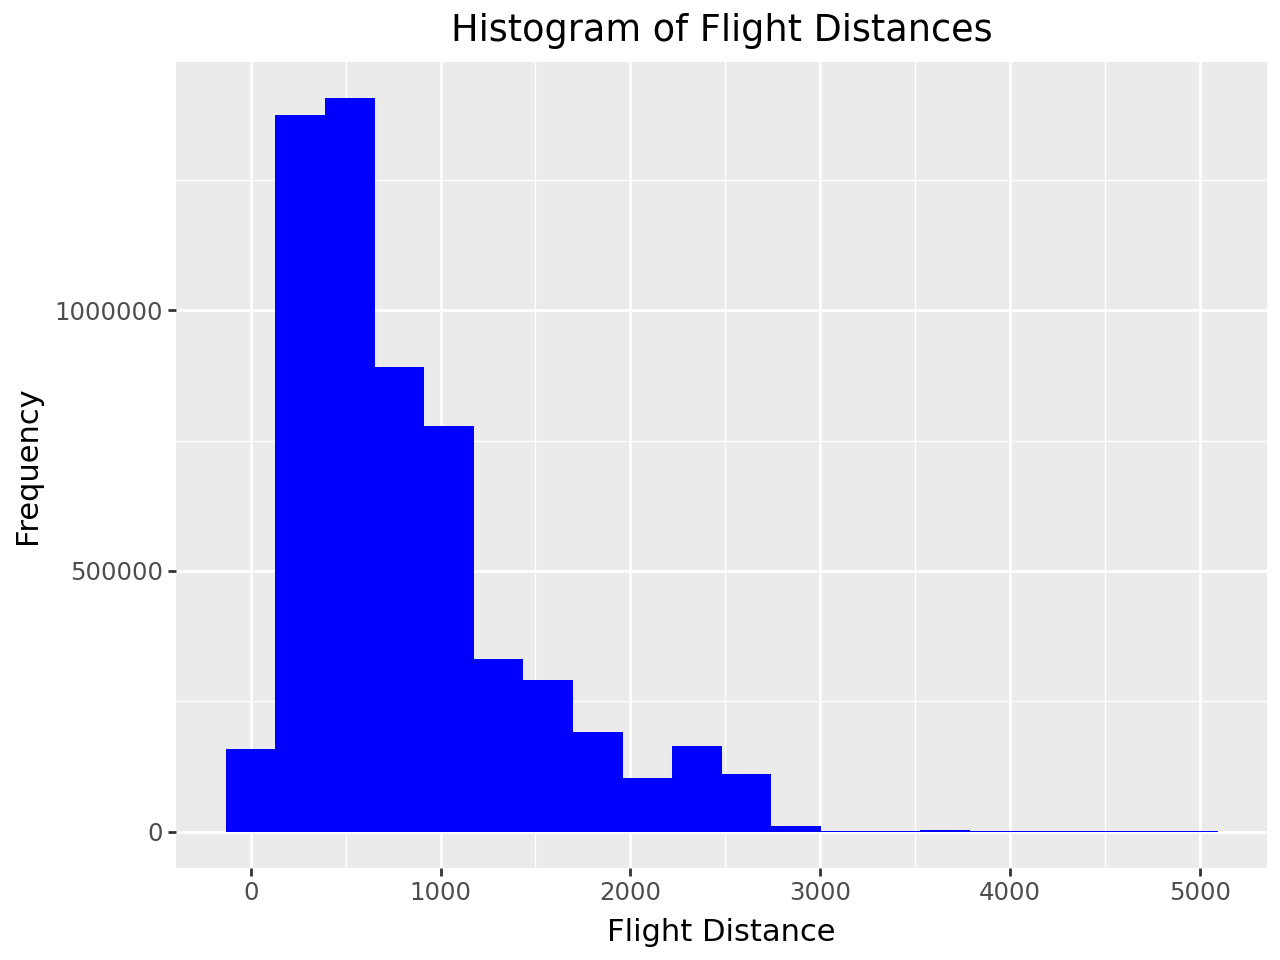

In [173]:
#import necessary libraries
from plotnine import *

#histogram of flight distances
hist = ggplot(flights, aes(x = "DISTANCE")) + geom_histogram(bins = 20, fill = "blue") + labs(x = "Flight Distance", y = "Frequency", title = "Histogram of Flight Distances")
hist.show()

In [174]:
"""16. Create a bar chart showing the top 5 airlines with the highest average arrival delay (10 points)."""

'16. Create a bar chart showing the top 5 airlines with the highest average arrival delay (10 points).'

                        AIRLINE  AVERAGE_ARRIVAL_DELAY
0              Spirit Air Lines              14.471800
1        Frontier Airlines Inc.              12.504706
2               JetBlue Airways               6.677861
3   Atlantic Southeast Airlines               6.585379
4  American Eagle Airlines Inc.               6.457873


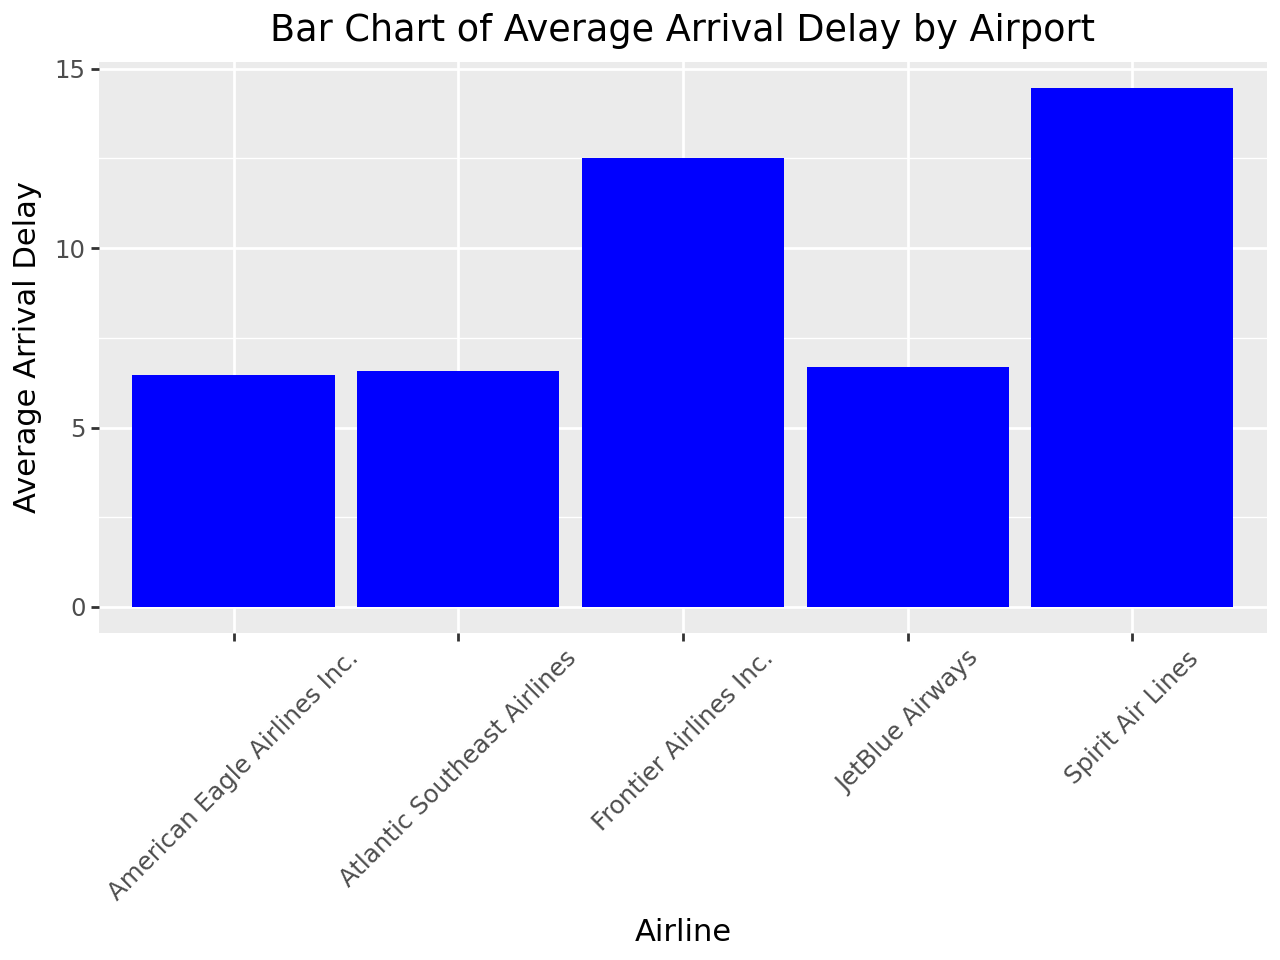

In [175]:
#computing highest average arrival delays
avg_arrival_delay = flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
avg_arrival_delay = avg_arrival_delay.reset_index()
top_avg_arrival_delay = avg_arrival_delay.sort_values(by = 'ARRIVAL_DELAY', ascending = False).head(5)

#merging datasets to retrieve full airline names
top_avg_arrival_delay = pd.merge(top_avg_arrival_delay, airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE')

#dropping duplicate columns and renaming columns
top_avg_arrival_delay.drop('AIRLINE_x', axis = 1, inplace = True)
top_avg_arrival_delay.columns = ['AVERAGE_ARRIVAL_DELAY', "IATA_CODE", "AIRLINE"]
print(top_avg_arrival_delay[['AIRLINE', 'AVERAGE_ARRIVAL_DELAY']])

#bar chart showing the top 5 airlines with the highest average arrival delay
bar = ggplot(top_avg_arrival_delay, aes(x = 'AIRLINE', y = 'AVERAGE_ARRIVAL_DELAY')) + geom_bar(stat = 'identity', fill = "blue") + theme(axis_text_x = element_text(angle = 45)) + labs(x = "Airline", y = "Average Arrival Delay", title = "Bar Chart of Average Arrival Delay by Airport")
bar.show()
